In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
cd "/content/drive/MyDrive/Workspace/4-1 수업/컴퓨터비전/코드"

/content/drive/MyDrive/Workspace/4-1 수업/컴퓨터비전/코드


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1. -1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0. -1. -1.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0

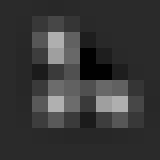

In [12]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

# Image setup
img = np.array([[0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0],
                [0,0,0,1,1,0,0,0,0,0],
                [0,0,0,1,1,1,0,0,0,0],
                [0,0,0,1,1,1,1,0,0,0],
                [0,0,0,1,1,1,1,1,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0]], dtype=np.float32)

# Derivative kernels
ux = np.array([[-1, 0, 1]])
uy = np.array([[-1], [0], [1]])
k = cv.getGaussianKernel(3, 1)
g = np.outer(k, k.transpose())

# Image derivatives
dy = cv.filter2D(img, cv.CV_32F, uy)
dx = cv.filter2D(img, cv.CV_32F, ux)
dyy = dy * dy
dxx = dx * dx
dyx = dy * dx

# Gaussian filtered second moments
gdyy = cv.filter2D(dyy, cv.CV_32F, g)
gdxx = cv.filter2D(dxx, cv.CV_32F, g)
gdyx = cv.filter2D(dyx, cv.CV_32F, g)

# Corner response
C = (gdyy * gdxx - gdyx * gdyx) - 0.04 * (gdyy + gdxx) ** 2

# Non-maximum suppression
for j in range(1, C.shape[0] - 1):
    for i in range(1, C.shape[1] - 1):
        if C[j, i] > 0.1 and np.sum(C[j, i] > C[j-1:j+2, i-1:i+2]) == 8:
            img[j, i] = 9  # Mark feature points on the original image

# Printing matrix representations for debugging
np.set_printoptions(precision=2)
print(dy, dx, dyy, dxx, dyx, gdyy, gdxx, gdyx, C, img)

# Preparing and displaying an image
popping = np.zeros([160, 160], np.uint8)
for j in range(160):
    for i in range(160):
        if C[j//16, i//16] > -0.06:  # Adjust threshold according to visible range in output
            popping[j, i] = np.uint8(min(255, (C[j//16, i//16] + 0.06) * 700))

cv2_imshow(popping)  # Display the processed image correctly
cv.waitKey(0)
cv.destroyAllWindows()


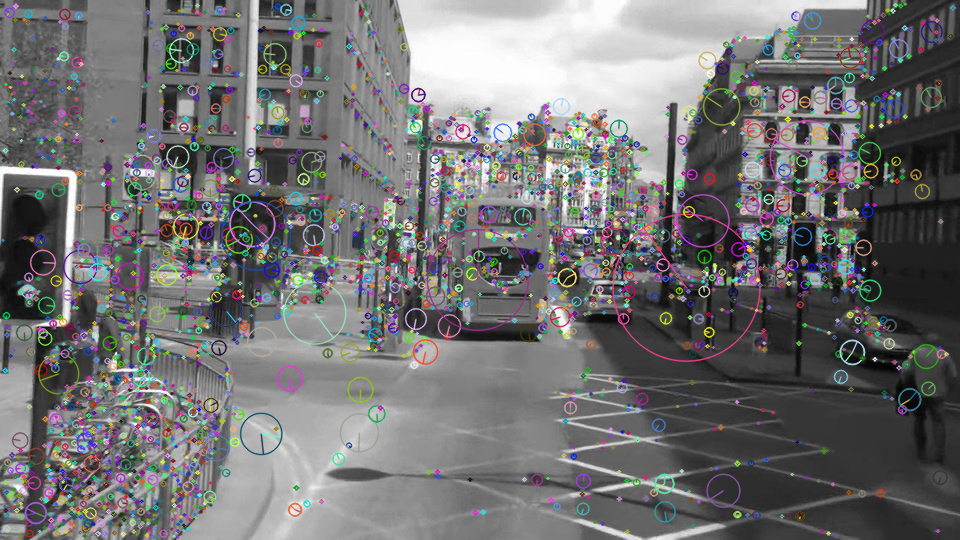

In [22]:
from google.colab.patches import cv2_imshow
import cv2 as cv

img = cv.imread('./mot_color70.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

gray = cv.drawKeypoints(gray, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(gray)  # 수정된 부분: 'SIFT Image' 문자열 대신 gray 이미지 데이터를 전달

k = cv.waitKey(0)  # 0을 추가하여 키 입력을 기다림
cv.destroyAllWindows()

특징점 개수: 231 4096
매칭에 걸린 시간: 0.10009121894836426


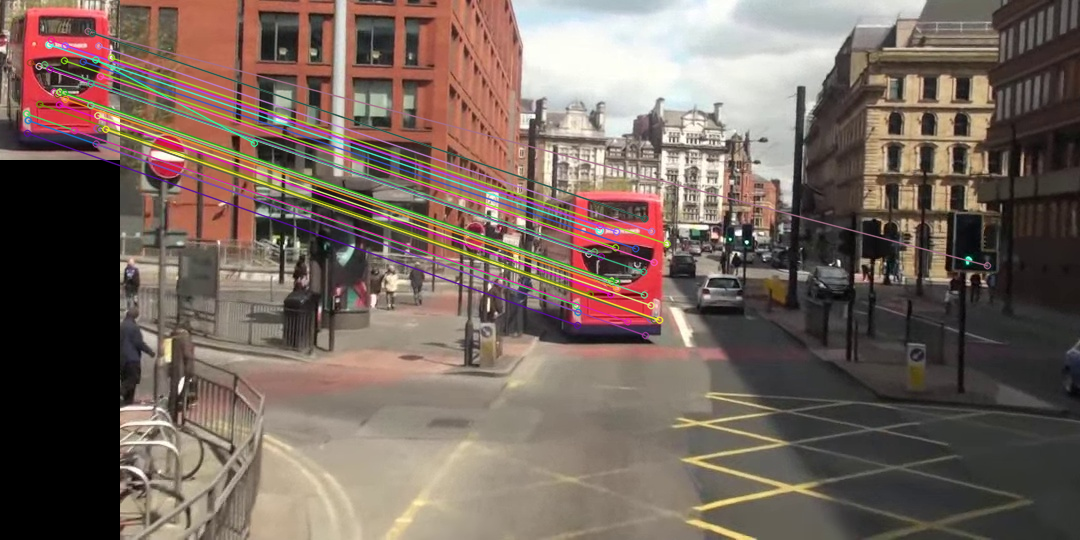

In [25]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow  # Google Colab에서 사용하는 imshow
import time

img1 = cv.imread('mot_color70.jpg')[190:350,440:560]
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.imread('mot_color83.jpg')
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('특징점 개수:', len(kp1), len(kp2))

start = time.time()
flann_matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
knn_match = flann_matcher.knnMatch(des1, des2, 2)

T = 0.7
good_match = []
for nearest1, nearest2 in knn_match:
    if nearest1.distance / nearest2.distance < T:
        good_match.append(nearest1)
print('매칭에 걸린 시간:', time.time() - start)

img_match = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1] + img2.shape[1], 3), dtype=np.uint8)
cv.drawMatches(img1, kp1, img2, kp2, good_match, img_match, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_match)  # 수정된 부분: 'Good Matches' 문자열 대신 img_match 이미지 데이터를 전달

k = cv.waitKey(0)  # 0을 추가하여 키 입력을 기다림
cv.destroyAllWindows()


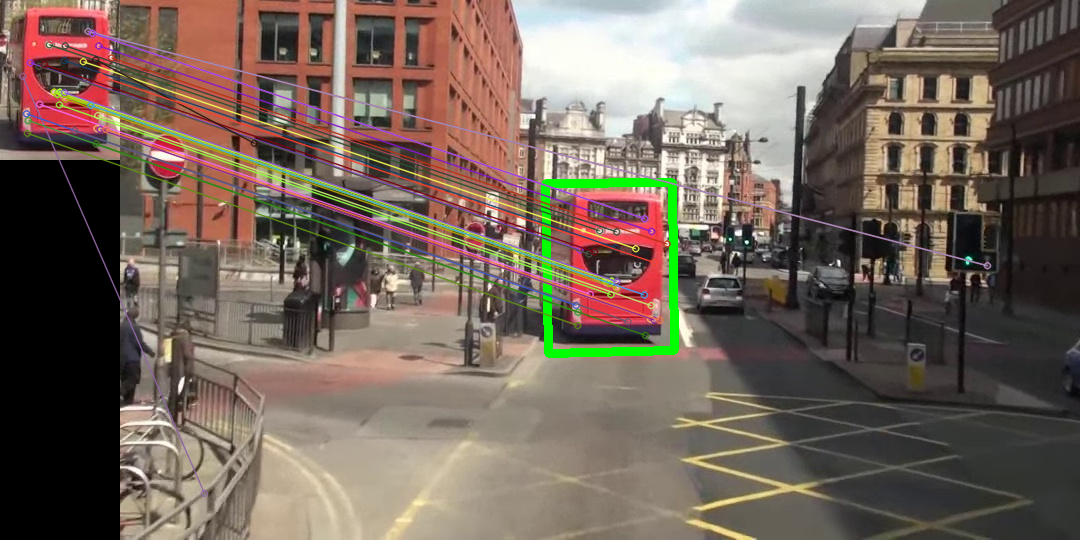

In [26]:
import cv2 as cv
import numpy as np

img1=cv.imread('mot_color70.jpg')[190:350,440:560] # 버스를 크롭하여 모델 영상으로 사용
gray1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('mot_color83.jpg')
# 장면 영상
gray2=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

sift=cv.SIFT_create()
kp1,des1=sift.detectAndCompute (gray1,None)
kp2,des2=sift.detectAndCompute (gray2,None)

flann_matcher=cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
knn_match=flann_matcher.knnMatch(des1,des2,2)

# 최근접 2개
T=0.7
good_match=[]
for nearest1,nearest2 in knn_match:
    if (nearest1.distance/nearest2.distance)<T:
        good_match .append (nearest1)

points1=np.float32([kp1[gm.queryIdx].pt for gm in good_match])
points2=np.float32([kp2[gm.trainIdx].pt for gm in good_match])

H,_=cv.findHomography(points1,points2,cv.RANSAC)

h1,w1=img1.shape[0],img1.shape[1]
h2,w2=img2.shape[0], img2.shape[1]

# 첫 번째 영상의 크기 # 두 번째 영상의 크기
box1=np. float32([[0,0],[0,h1-1],[w1-1,h1-1], [w1-1,0]]) .reshape(4,1,2)
box2=cv.perspectiveTransform(box1,H)

img2=cv.polylines(img2,[np.int32 (box2)], True, (0,255,0),8)

img_match=np.empty ((max (h1,h2),w1+w2,3), dtype=np.uint8)
cv.drawMatches(img1,kp1,img2, kp2,good_match,img_match, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_match)
k=cv.waitKey()
cv.destroyAllWindows()